In [1]:
#importing all necessary data packages 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Exploratory Data Analysis and Visualisation

In [2]:
#importing dataset for analysis
data=pd.read_csv("C:\sm_final.csv")

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\mabeteng\AppData\Local\Temp\ipykernel_11348\2832708083.py:2: SyntaxWarning: invalid escape sequence '\s'
  data=pd.read_csv("C:\sm_final.csv")


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Between 2 and 3 hours'),
  Text(1, 0, 'More than 5 hours'),
  Text(2, 0, 'Between 3 and 4 hours'),
  Text(3, 0, 'Less than an Hour'),
  Text(4, 0, 'Between 1 and 2 hours'),
  Text(5, 0, 'Between 4 and 5 hours')])

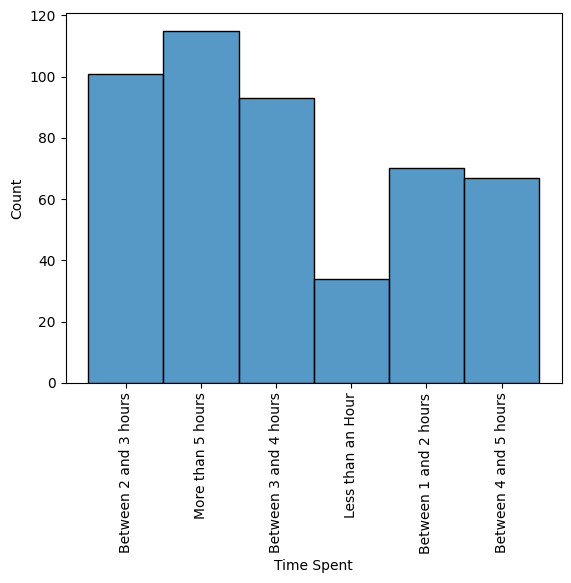

In [3]:
sns.histplot(data=data,x='Time Spent')
plt.xticks(rotation=90)

We can conclude that there are less than 40 individuals spending less than an hour on social media and roughly 120 individuals spend more than 5 hours.

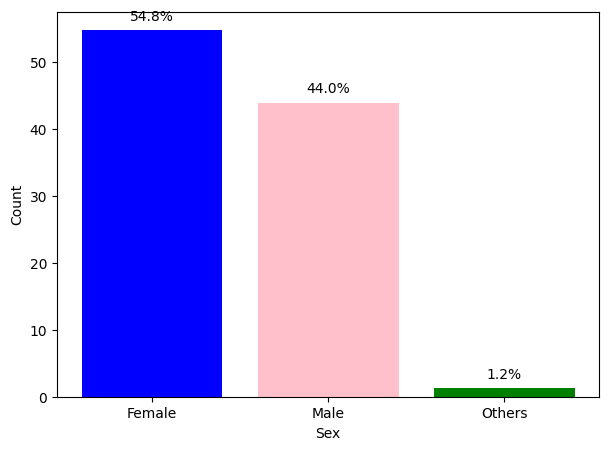

In [4]:
sex_counts = data['Sex'].value_counts(normalize=True) * 100
plt.figure(figsize=(7, 5))
bars= plt.bar(sex_counts.index, sex_counts.values, color=['blue', 'pink', 'green'])
plt.xlabel('Sex')
plt.ylabel('Count')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom', fontsize=10)


In [5]:
data['Sex'].value_counts()

Sex
Female    263
Male      211
Others      6
Name: count, dtype: int64

Females make up the majority in the sample, totaling to 263 out of 479 participants while the Others category  make up only 1.2% of the sample size.

In [6]:
outcome_counts=data['Outcome'].value_counts(normalize=True)*100
outcome_counts

Outcome
0    73.333333
1    26.666667
Name: proportion, dtype: float64

About 26.7% of participant sample score higher than the threshold score of 42, whom are experiencing mental health symptoms, which will be recommended for a mental health check up.

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Less than an Hour'),
  Text(1, 0, 'Between 1 and 2 hours'),
  Text(2, 0, 'Between 2 and 3 hours'),
  Text(3, 0, 'Between 3 and 4 hours'),
  Text(4, 0, 'Between 4 and 5 hours'),
  Text(5, 0, 'More than 5 hours')])

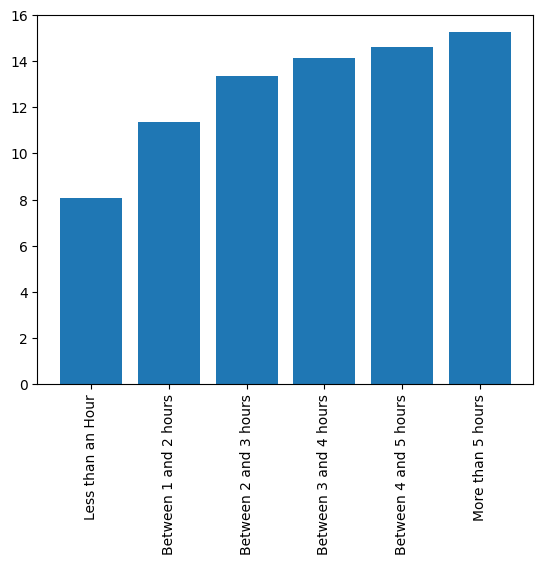

In [7]:
adhd=data.groupby('Time Spent')['ADHD Score'].mean().sort_values(ascending=True)
plt.bar(adhd.index, adhd.values)
plt.xticks(rotation=90)

Graph shows mean ADHD Score of each time group of participants.

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Less than an Hour'),
  Text(1, 0, 'Between 1 and 2 hours'),
  Text(2, 0, 'Between 2 and 3 hours'),
  Text(3, 0, 'Between 4 and 5 hours'),
  Text(4, 0, 'Between 3 and 4 hours'),
  Text(5, 0, 'More than 5 hours')])

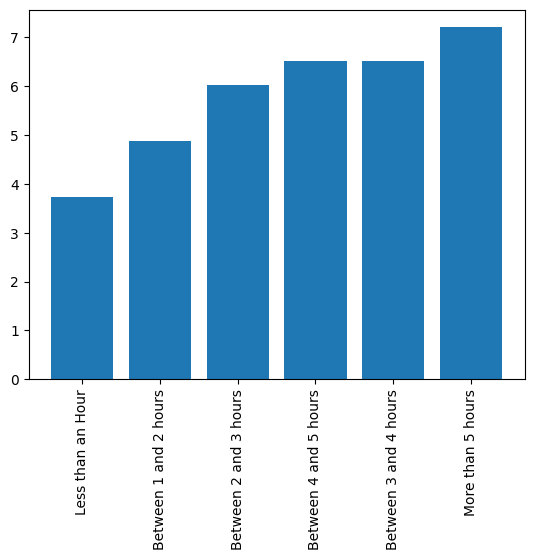

In [8]:
anxiety=data.groupby('Time Spent')['Anxiety Score'].mean().sort_values(ascending=True)
plt.bar(anxiety.index, anxiety.values)
plt.xticks(rotation=90)

Graph shows mean anxiety Score of each time group of participants.

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Less than an Hour'),
  Text(1, 0, 'Between 1 and 2 hours'),
  Text(2, 0, 'Between 2 and 3 hours'),
  Text(3, 0, 'Between 3 and 4 hours'),
  Text(4, 0, 'More than 5 hours'),
  Text(5, 0, 'Between 4 and 5 hours')])

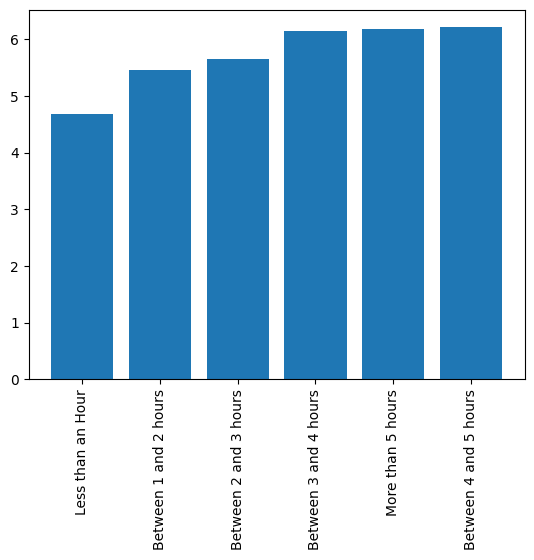

In [9]:
self_esteem=data.groupby('Time Spent')['Self Esteem Score'].mean().sort_values(ascending=True)
plt.bar(self_esteem.index, self_esteem.values)
plt.xticks(rotation=90)

Graph shows mean Self Esteem Score of each time group of participants.

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Less than an Hour'),
  Text(1, 0, 'Between 1 and 2 hours'),
  Text(2, 0, 'Between 2 and 3 hours'),
  Text(3, 0, 'Between 3 and 4 hours'),
  Text(4, 0, 'Between 4 and 5 hours'),
  Text(5, 0, 'More than 5 hours')])

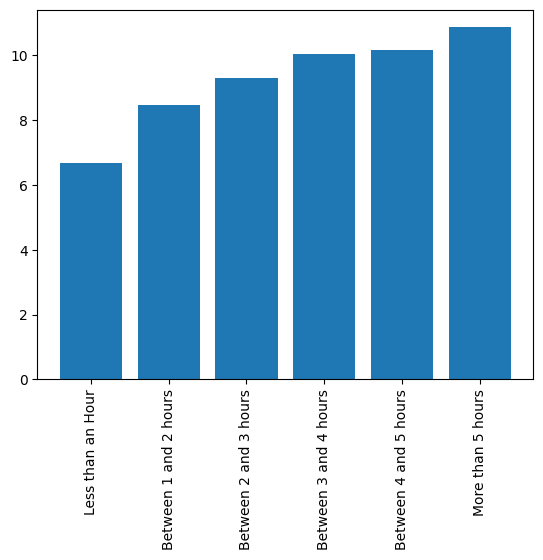

In [10]:
depression=data.groupby('Time Spent')['Depression Score'].mean().sort_values(ascending=True)
plt.bar(depression.index, depression.values)
plt.xticks(rotation=90)

Graph shows mean Depression Score of each time group of participants.

From the above graphs, we can conclude that the more hours an individual spend on social media, the more likely an individual experiences negative pressures on their mental health.

## Correlation Matrix and Heatmap

Due to heatmaps correlation being able to be extracted from numerical values, 'Time Spent' Column is first converted from string to interger. Each time group is assgned to numeric values, which converts the entire column from object to int64 type.

'Less than an Hour' = 0

'Between 1 and 2 hours' = 1

'Between 2 and 3 hours' = 2

'Between 3 and 4 hours' = 3

'Between 4 and 5 hours' = 4

'More than 5 hours' = 5

In [11]:
# Mapping for 'Time Spent' column
time_spent_mapping = {
    'Less than an Hour': 0,
    'Between 1 and 2 hours': 1,
    'Between 2 and 3 hours': 2,
    'Between 3 and 4 hours': 3,
    'Between 4 and 5 hours': 4,
    'More than 5 hours': 5
}

# Convert 'Time Spent' to numeric values
data['Time Spent'] = data['Time Spent'].map(time_spent_mapping)


In the 'Sex' column, numerical values will also be assigned to be used in the correlation plot and heatmap.

In [12]:
#setting Male to 0, Female to 1, and Others to 2.
data.loc[data['Sex'] == 'Male', 'Sex'] = 0
data.loc[data['Sex'] == 'Female', 'Sex'] = 1
data.loc[data['Sex'] == 'Others', 'Sex'] = 2

In [13]:
data.head()

,Age,Sex,Relationship Status,Occupation,Affiliations,Social Media User?,Platforms Used,Time Spent,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Total Score,Outcome
0,21,0,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",2,18,4,4,14,40,0
1,21,1,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",5,15,7,7,14,43,1
2,21,1,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",3,11,6,4,11,32,0
3,21,1,Single,University Student,University,Yes,"Facebook, Instagram",5,12,6,8,9,35,0
4,21,1,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",2,17,9,6,9,41,0


In [14]:
# Exclude non-numeric columns
data.drop(columns='Total Score',inplace=True)
numeric_columns = data.select_dtypes(include=[np.number]).columns
numeric_data = data[numeric_columns]

<Axes: >

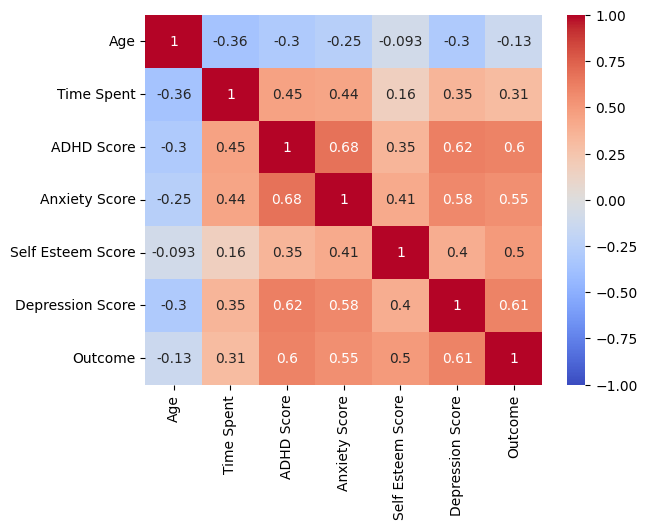

In [15]:
#compute correlation matrix
corr_matrix=numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

From the above correlation plot, it can be observed that the time spent on social media has a moderately strong and positive correlation with all 4 aspects of mental health scores that are ADHD, Anxiety, with r values of 0.45, 0.44 respectively. As for health scores for Self Esteem and Depression, correlation values are on the weaker side, with r values of  0.16 and 0.35 respectively.

Correlation between age and other variables show negative weak correlation (-0.36<r>-0.093) This indicates the older the participant's age, the lower their social media usage and mental health scores will be. 





# Conclusion 

Based on the insights obtained from the analysis, the data consistently verifies that increased hours spent on social media are strongly associated with a higher likelihood of experiencing negative mental health symptoms. Individuals who engage in prolonged social media usage are more prone to feelings of anxiety, depression, and stress. The frequency and intensity of these adverse effects are reflected in higher Likert scale scores, indicating a significant correlation between extensive social media engagement and deteriorating mental well-being.

This finding underscores the importance of monitoring and managing social media usage to mitigate its potential harmful effects on mental health. It also highlights the need for awareness programs and interventions that encourage healthy digital habits. 

By addressing the impact of social media on mental health, stakeholders, including healthcare providers, educators, and policymakers, can take proactive measures to promote mental well-being in the digital age.

